In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 네브라스카주 링컨시 데이터 다운: https://github.com/amcquistan/WeatherPredictPythonML
df_weather = pd.read_csv("end-part2_df.csv", index_col="date")

# 2016년 데이터만 선택
df_2016 = df_weather.filter(like="2016", axis=0)

# 날짜에서 월 추출
df_2016.reset_index(inplace=True)
df_2016["month"] = df_2016["date"].apply(lambda s: int(s.split("-")[1]))

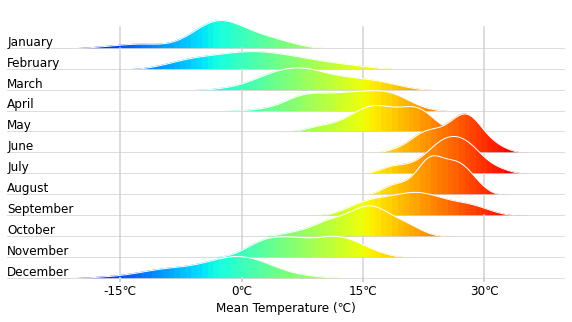

In [119]:
fig,axes = plt.subplots(12,1,sharex=True, sharey=True,figsize=(10,5))
x = np.linspace(0,1,100)
import calendar 

for i,ax in enumerate(axes,1):
    temp_meantempm = df_2016.loc[df_2016['month']==i,'meantempm']
    
    sns.kdeplot(temp_meantempm, fill=True,color='w',alpha=0,ax=ax)
    ax.set_xlim(-29, 40)
    path = ax.collections[0].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform = ax.transData)

    im = ax.imshow(np.vstack([x,x]),cmap='jet',
                   aspect = 'auto',
                   extent=[*ax.get_xlim(), *ax.get_ylim()]
                    )
    im.set_clip_path(patch)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y:str(int(x)) + '℃'))
    
    ax.text(-29, 0.01 ,calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
        
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.yaxis.set_visible(False)
    ax.axhline(0, color="lightgray")
    ax.set_facecolor("none")
#     ax.set_yticks([]) 
#     ax.set_ylabel("") 
    
fig.subplots_adjust(hspace=-0.5)

(0.0, 0.1261992472036253)

In [39]:
ax.collections

[]

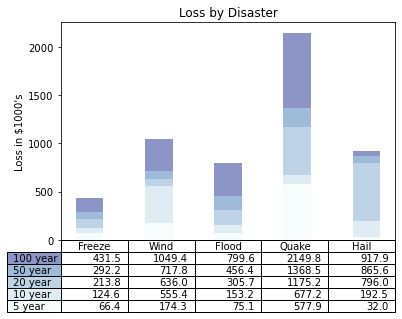

In [17]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
# plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [19]:
colors[1]

array([0.61877739, 0.73550173, 0.85397924, 1.        ])

In [20]:
data

[[66386, 174296, 75131, 577908, 32015],
 [58230, 381139, 78045, 99308, 160454],
 [89135, 80552, 152558, 497981, 603535],
 [78415, 81858, 150656, 193263, 69638],
 [139361, 331509, 343164, 781380, 52269]]

In [21]:
data[1]

[58230, 381139, 78045, 99308, 160454]

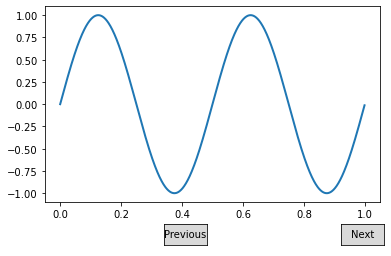

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)

class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.4, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

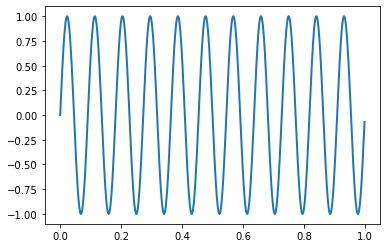

In [149]:
l = plt.plot(t, s, lw=2)
i = 3 % len(freqs)
ydata = np.sin(2*np.pi*freqs[i]*t)
l[0].set_ydata(ydata)

In [182]:
from IPython.display import display
df1 = pd.DataFrame([[1,1,2,3],[6,1,2,1]])
df2 = df1.copy()
display(df1)
df2.iloc[1,1]=11
display(df2)
display(df1)

0  1  2  3
0  1  1  2  3
1  6  1  2  1

0   1  2  3
0  1   1  2  3
1  6  11  2  1

0  1  2  3
0  1  1  2  3
1  6  1  2  1

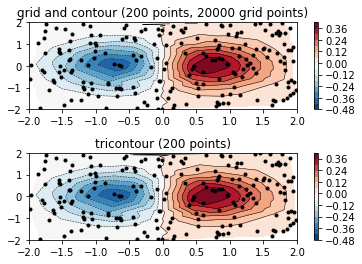

In [12]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

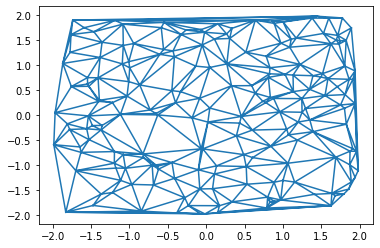

In [15]:
plt.triplot(triang)

In [16]:
triang